# Problem Set 9

## Yanwei Pan
panyw@uchicago.edu

### Problem 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [15]:
#####a#####
wine = pd.read_csv('data/strongdrink.txt')
wine.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


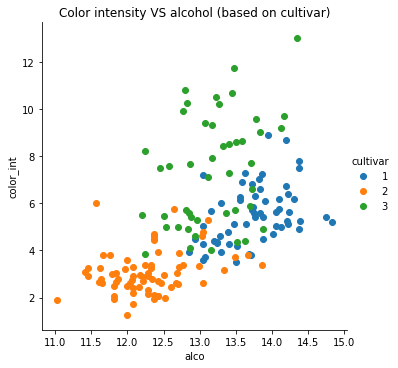

In [3]:
df = wine[['cultivar', 'alco', 'color_int']]
fg = sns.FacetGrid(data=df, hue='cultivar', height=5)
fg.map(plt.scatter, 'alco', 'color_int').add_legend()
plt.title('Color intensity VS alcohol (based on cultivar)')
plt.show()

In [5]:
#####b#####
X = wine[['alco', 'malic', 'tot_phen', 'color_int']]
y = wine['cultivar']

LogReg = LogisticRegression(random_state=25)
param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}


random_search_1 = RandomizedSearchCV(LogReg, param_distributions=param_dist1, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')
random_search_1.fit(X, y)

print('Optimal tuning parameter values = ', random_search_1.best_params_)
print('MSE =', -random_search_1.best_score_)

Optimal tuning parameter values =  {'C': 2.665871587495725, 'penalty': 'l1'}
MSE = 0.11931818181818182


C:\Users\xieyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\xieyx\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xieyx\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\xieyx\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [6]:
#####c#####
param_dist2 = {'n_estimators': sp_randint(10, 200),
                'max_depth': sp_randint(2, 4),
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}

tree = RandomForestClassifier(bootstrap=True,
                                  n_jobs=-1, 
                                  oob_score=True, 
                                  random_state=25)
random_search_2 = RandomizedSearchCV(tree, param_distributions=param_dist2, n_iter=200,
                                     n_jobs=-1, cv=5, random_state=25, 
                                    scoring='neg_mean_squared_error')
random_search_2.fit(X, y)

print('Optimal tuning parameter values = ', random_search_2.best_params_)
print('MSE =', -random_search_2.best_score_)

C:\Users\xieyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Optimal tuning parameter values =  {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 13, 'min_samples_split': 18, 'n_estimators': 176}
MSE = 0.13068181818181818


In [14]:
#####d#####
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
                'gamma': ['scale', 'auto'],
                'shrinking': [True, False]}

svc = SVC(kernel='rbf', random_state=25)

random_search_3 = RandomizedSearchCV(svc, param_distributions=param_dist3, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search_3.fit(X, y)
print('Optimal tuning parameters = ', random_search_3.best_params_)
print('MSE =', -random_search_3.best_score_)

Optimal tuning parameters =  {'C': 9.58835943424229, 'gamma': 'scale', 'shrinking': True}
MSE = 0.13636363636363635


C:\Users\xieyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [12]:
#####e#####
mlp = MLPClassifier(solver='lbfgs', random_state=25)

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
                'activation': ['logistic', 'relu'],
                'alpha': sp_uniform(0.1, 10.0)}

random_search_4 = RandomizedSearchCV(mlp, param_distributions=param_dist4, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search_4.fit(X, y)
print('Optimal tuning parameter values = ', random_search_4.best_params_)
print('MSE =', -random_search_4.best_score_)

Optimal tuning parameter values =  {'activation': 'relu', 'alpha': 1.0218890863291452, 'hidden_layer_sizes': 22}
MSE = 0.07954545454545454


C:\Users\xieyx\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


I think the multiple hidden layer neural network model is the best predictor of cultivar, because it has the lowest MSE.